### Minimization of the 2D Ackley function with the gradient descent method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definition of the 2D Ackley funtion and its derivatives with respect to x and y

In [45]:
# Function
def f(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.exp(1) + 20
    

# Derivatives
def df_dx(x, y):
    A = (4 * np.sqrt(0.5) * x * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2)))) / (np.sqrt(x**2 + y**2))
    B = np.pi * np.sin(2 * np.pi * x) * np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    return A + B


def df_dy(x, y):
    A = (4 * np.sqrt(0.5) * y * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2)))) / (np.sqrt(x**2 + y**2))
    B = np.pi * np.sin(2 * np.pi * y) * np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    return A + B


Let's visualize the function in the range [-3, 3] on both variables

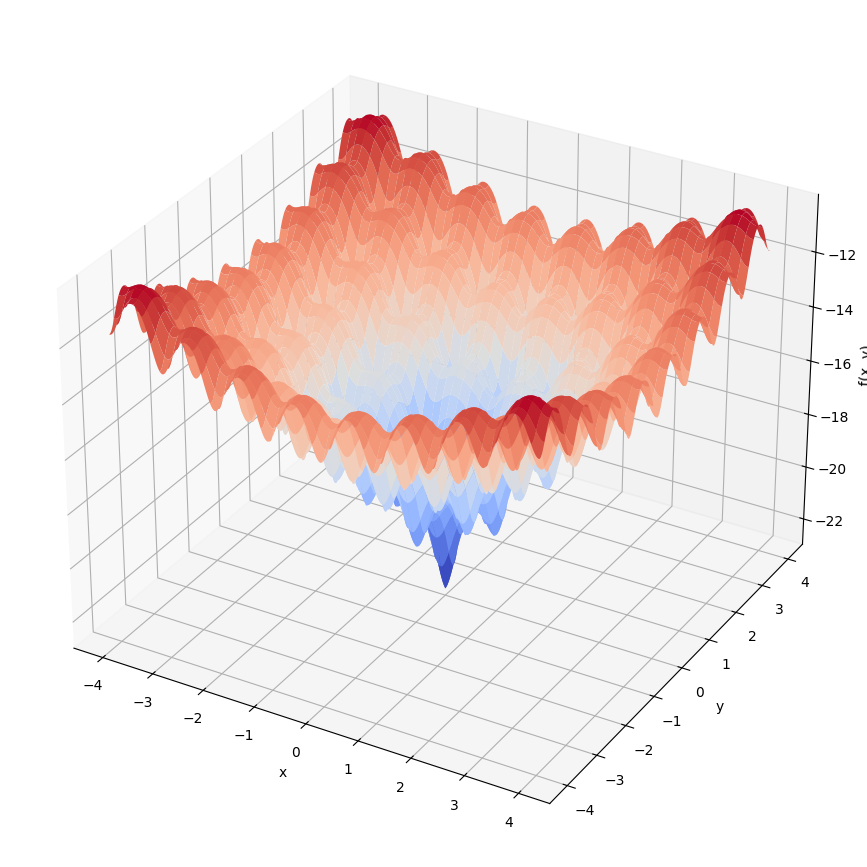

In [127]:
Xp, Yp = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
Zp = f(Xp, Yp)
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Xp, Yp, Zp, cmap='coolwarm')
#ax.scatter(*zip(*history), c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

Implementation of the gradient descent algorithm

In [101]:
# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

Executution of the code

In [207]:
# Perform gradient descent and print the results
start_x, start_y = 5,5
learning_rate = 0.1
num_iterations = 100
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)
print("   Minimum")
print("-------------")
print("x: ", "{0:.3g}".format(x_opt), ", y: ", "{0:.3g}".format(y_opt), " --> f(x,y): ", "{0:.3g}".format(f_opt), sep="")

   Minimum
-------------
x: 5.11, y: 5.11 --> f(x,y): -9.33


History

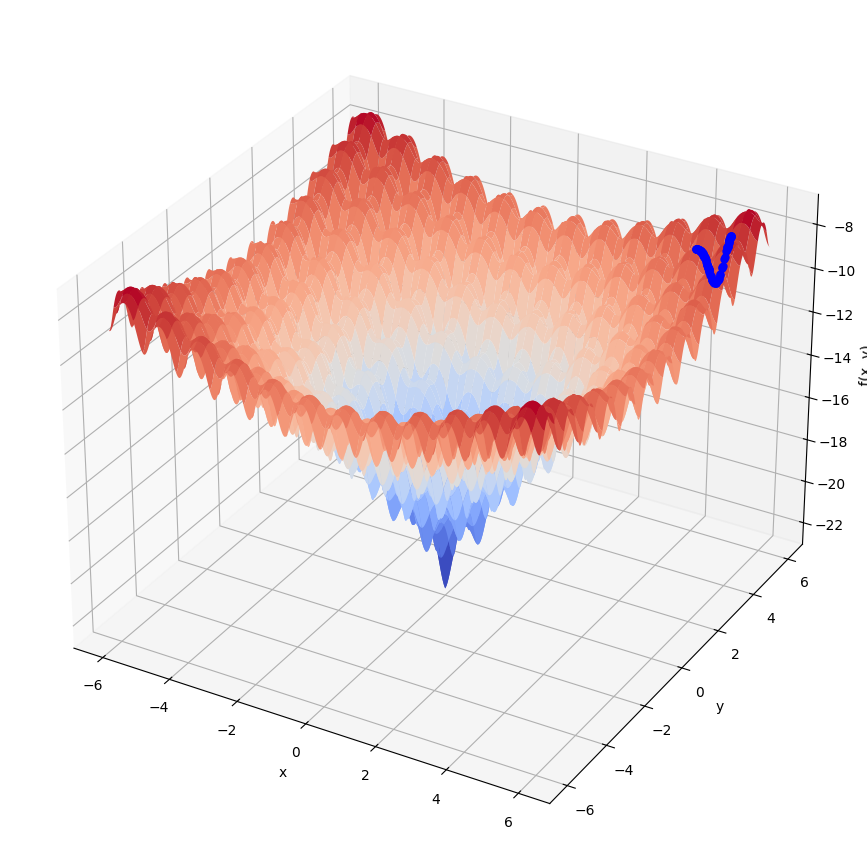

In [208]:
x, y = np.meshgrid(np.arange(-6, 6, 0.01), np.arange(-6, 6, 0.01))
z = f(x, y)
fig = plt.figure(figsize = (11,11))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.coolwarm, linewidth=0.1, zorder=1)
ax.plot(*zip(*history), 'b.', markersize=10, label='top', zorder=4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()